In [149]:
from dataAcquisition import DataAcquisition
from EDA import EDA
from dataPreprocessing import DataPreprocessing
import pandas as pd
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
X_train = pd.read_csv("data/X_train.csv")
y_train = pd.read_csv("data/y_train.csv")
X_test = pd.read_csv("data/X_test.csv")
y_test = pd.read_csv("data/y_test.csv")


# Exploratory Data Analysis

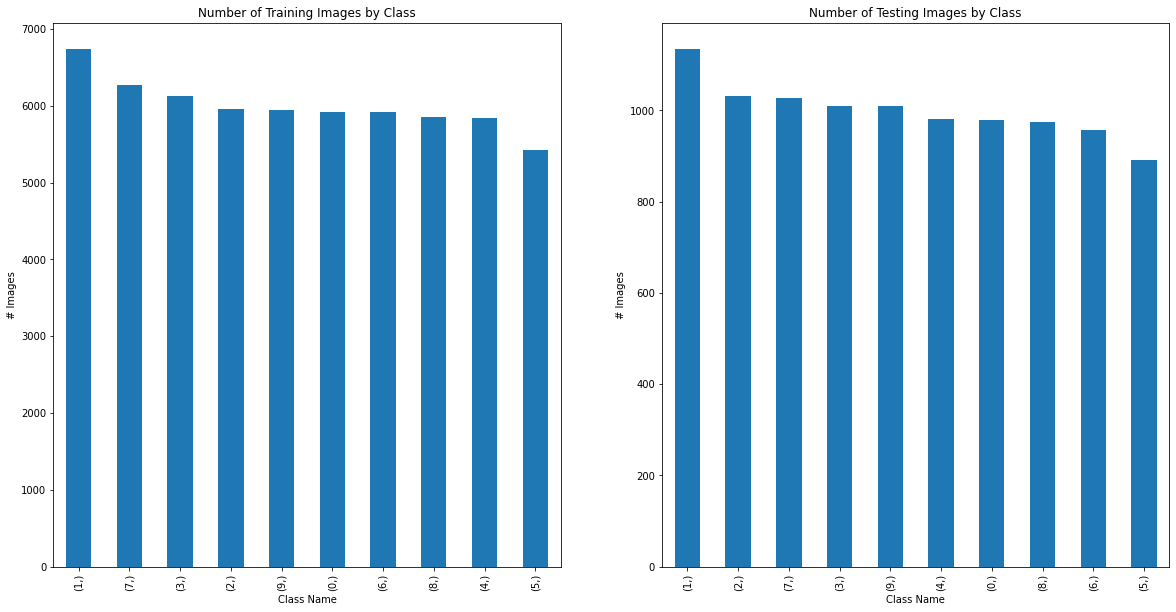

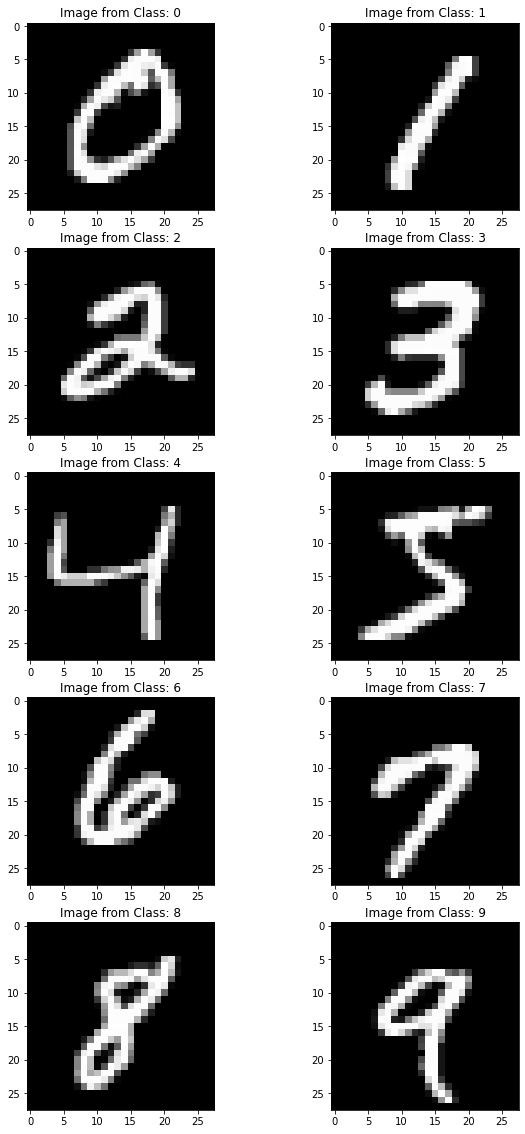

<bound method NDFrame.head of         pixel0   pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7  \
count  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel8   pixel9  ...      pixel774      pixel775      pixel776  \
count  60000.0  60000.0  ...  60000.000000  60000.000000  60000.000000   
mean       0.0      0.0  ...      0.200433      0.088867      0.045633   
std        0.0    

In [151]:
eda = EDA()

eda.plot(y_train, y_test, plot_type="classes_bar_plot")
eda.plot(X_train, y_train, plot_type="display_images")
stats = eda.descriptive_statistics(X_train)
print(stats.head)
constant_training_pixels = eda.find_constant_pixels(X_train)
constant_testing_pixels = eda.find_constant_pixels(X_test)
print(f"Constant Pixels in Training Set: {constant_training_pixels}")
print(f"Constant Pixels in Testing Set: {constant_testing_pixels}")

# Data Preprocessing

b: 784, a: 44


<Figure size 720x1440 with 0 Axes>

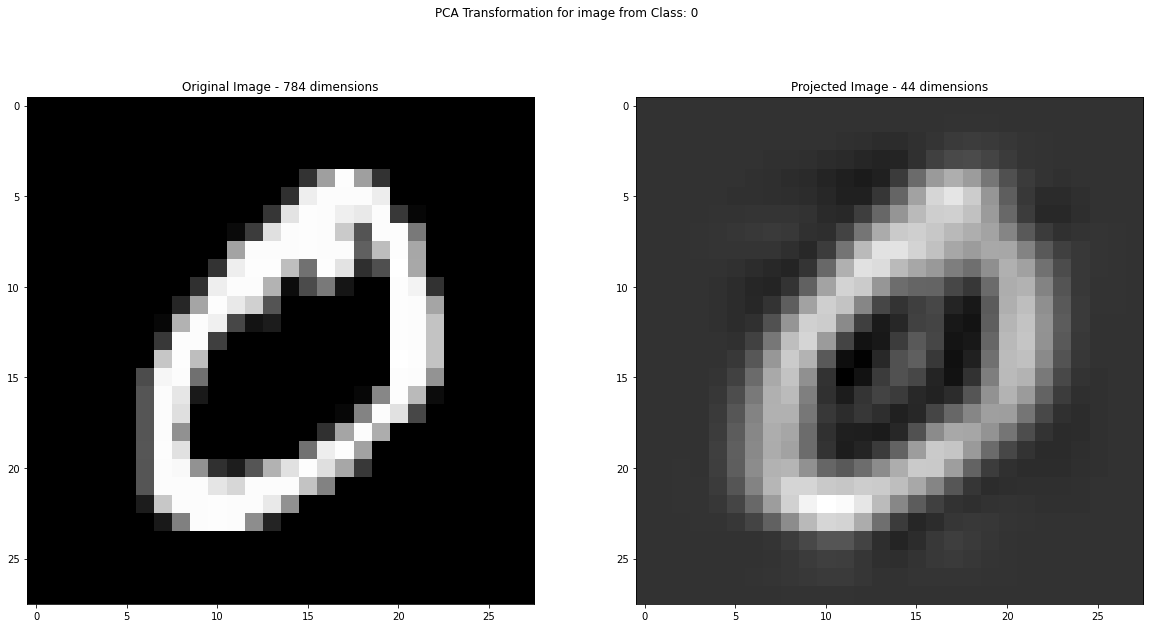

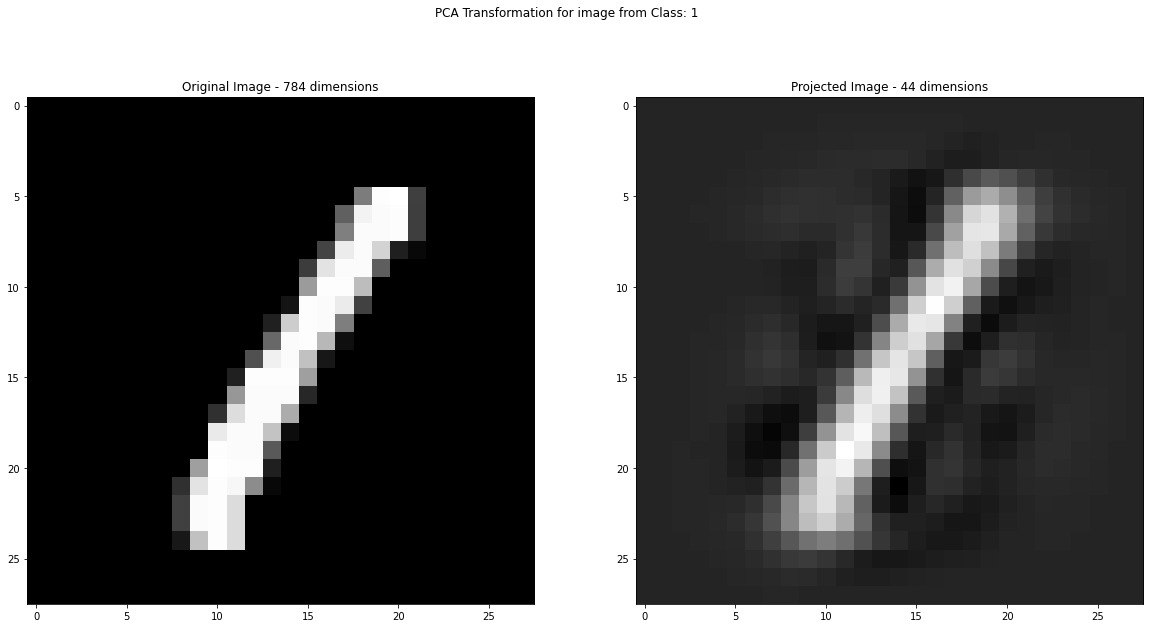

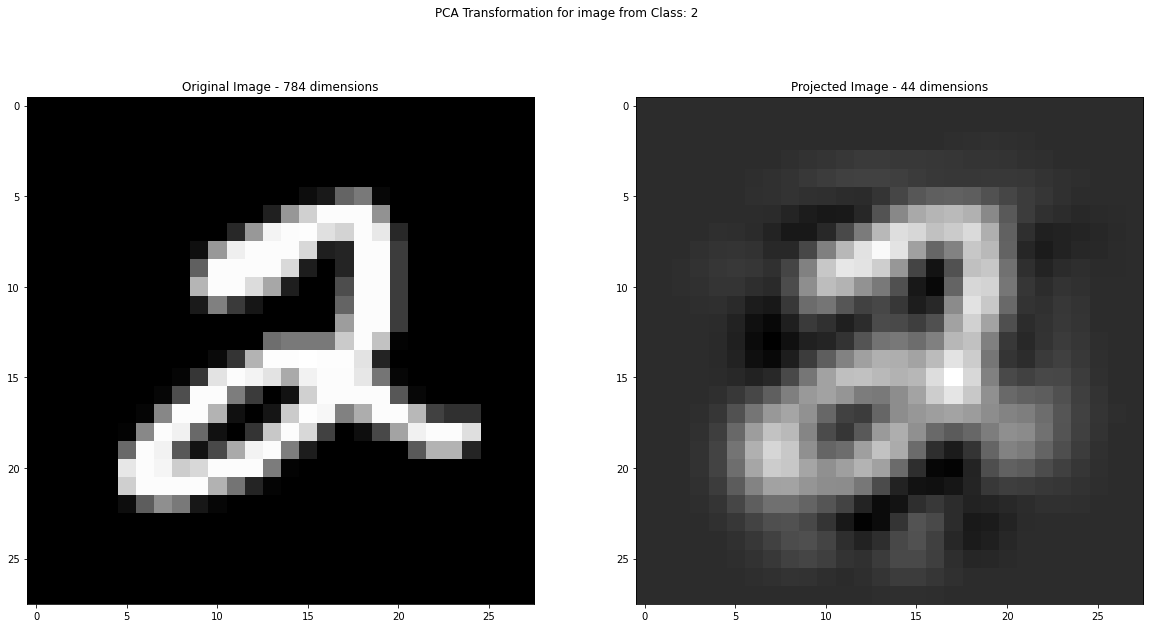

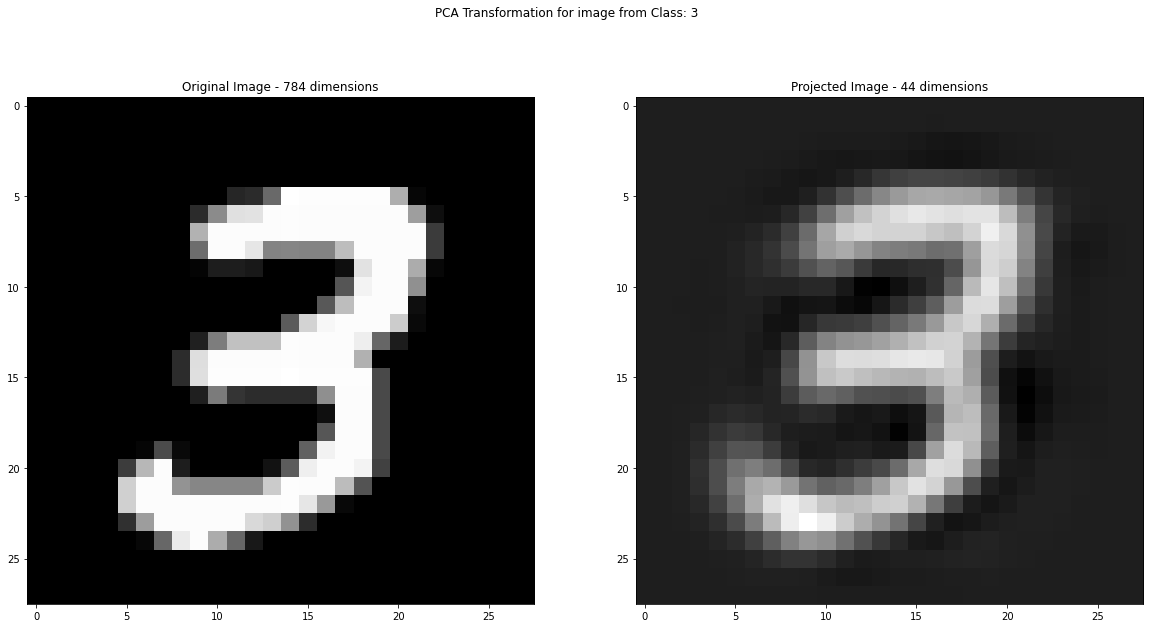

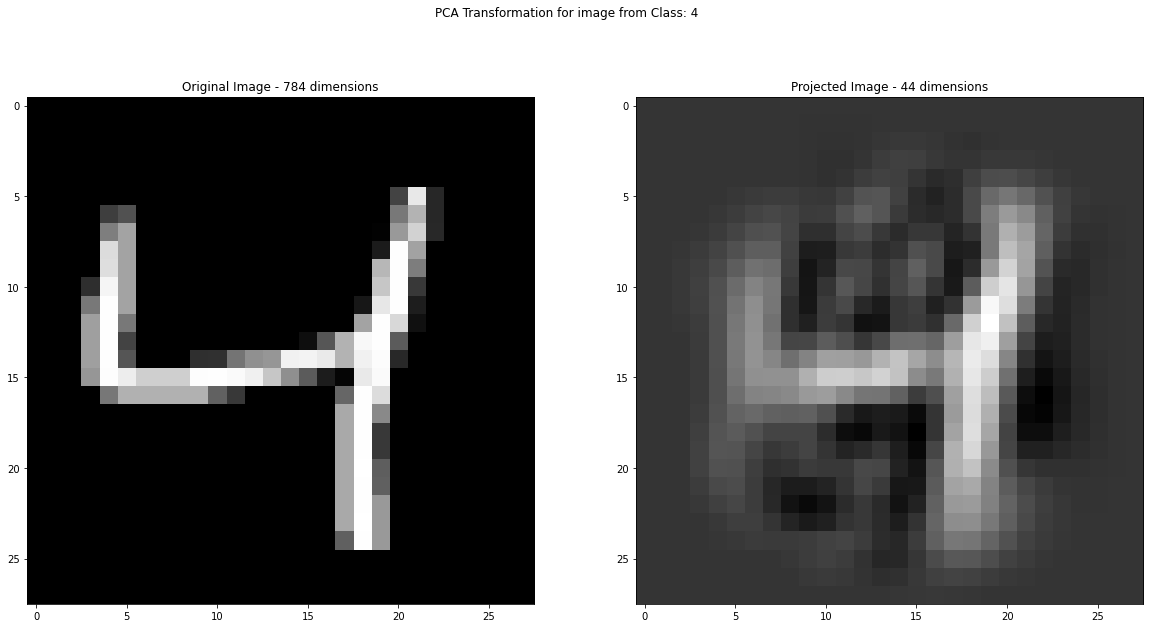

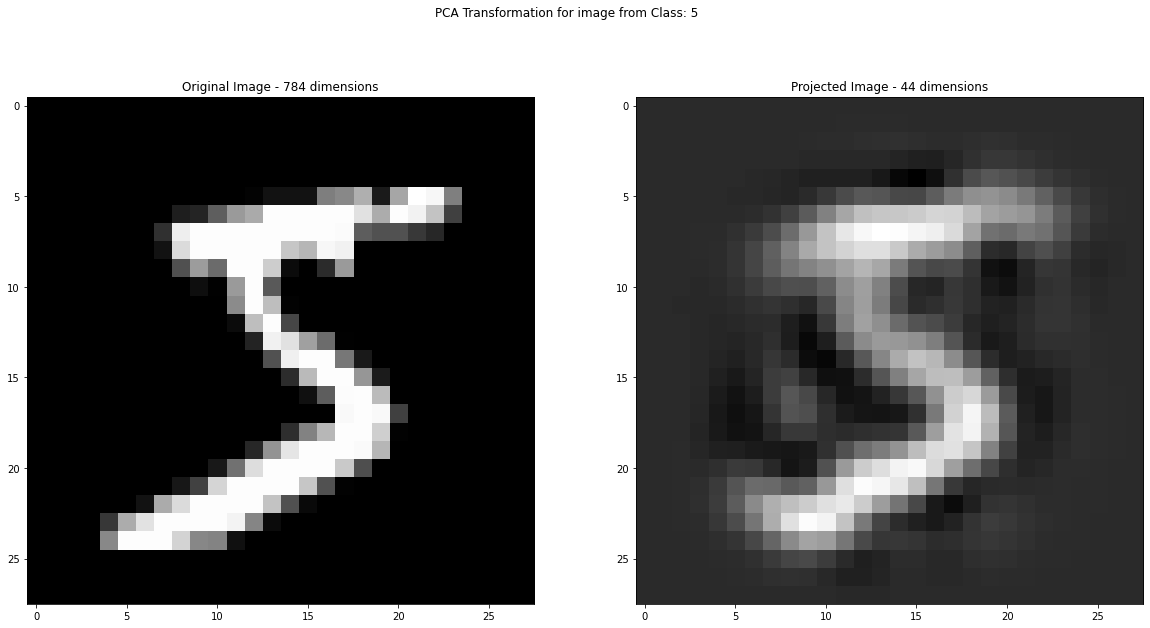

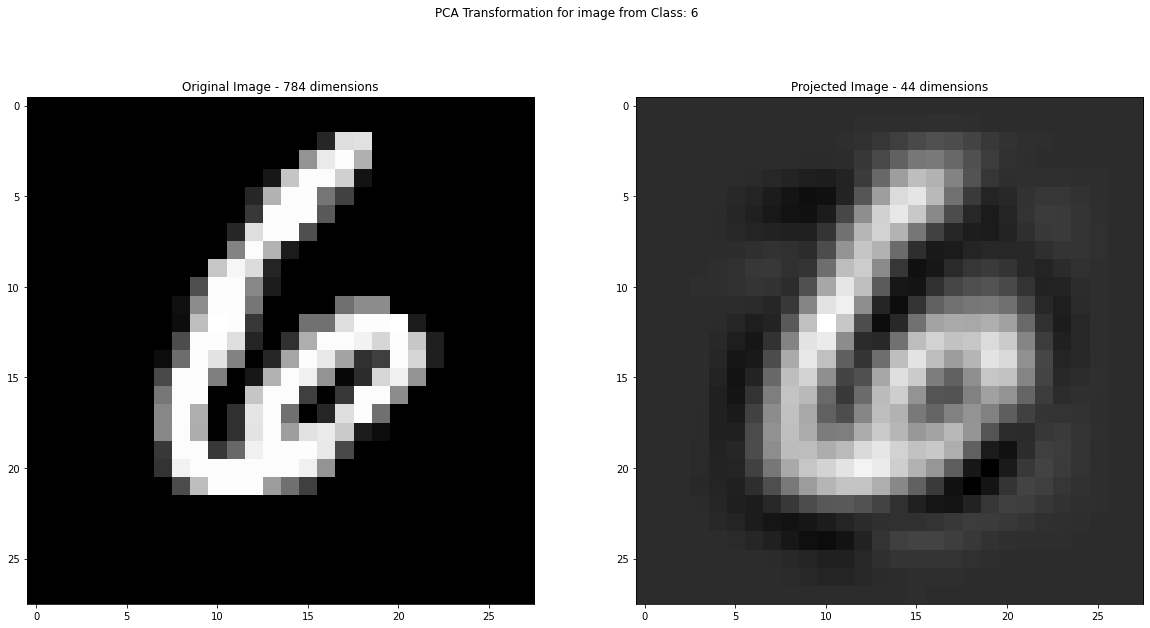

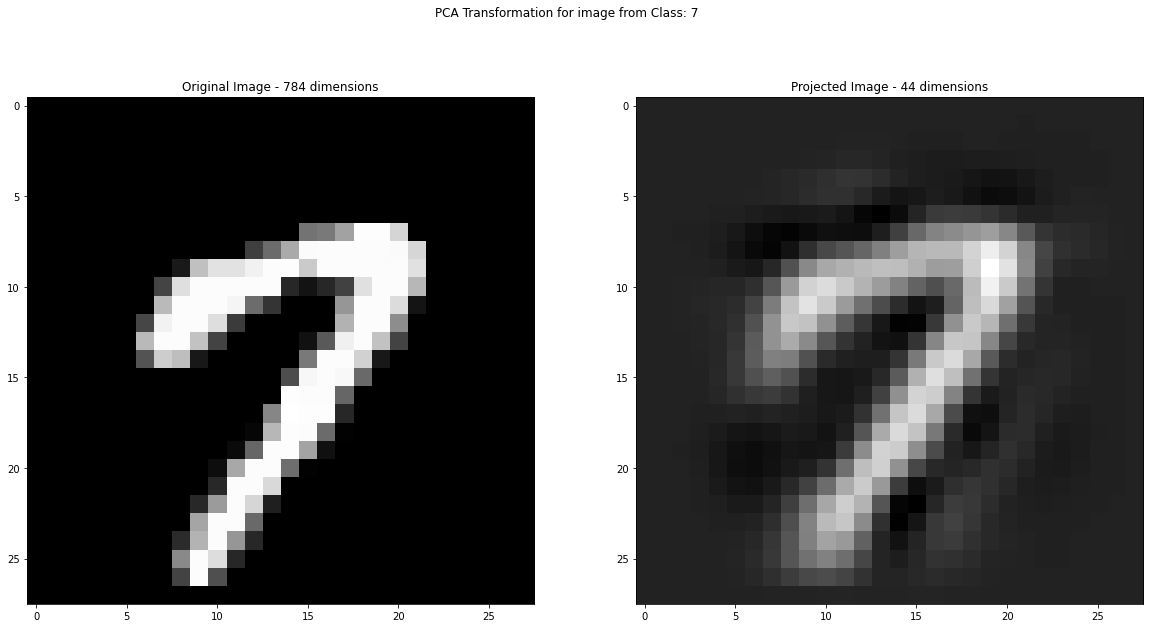

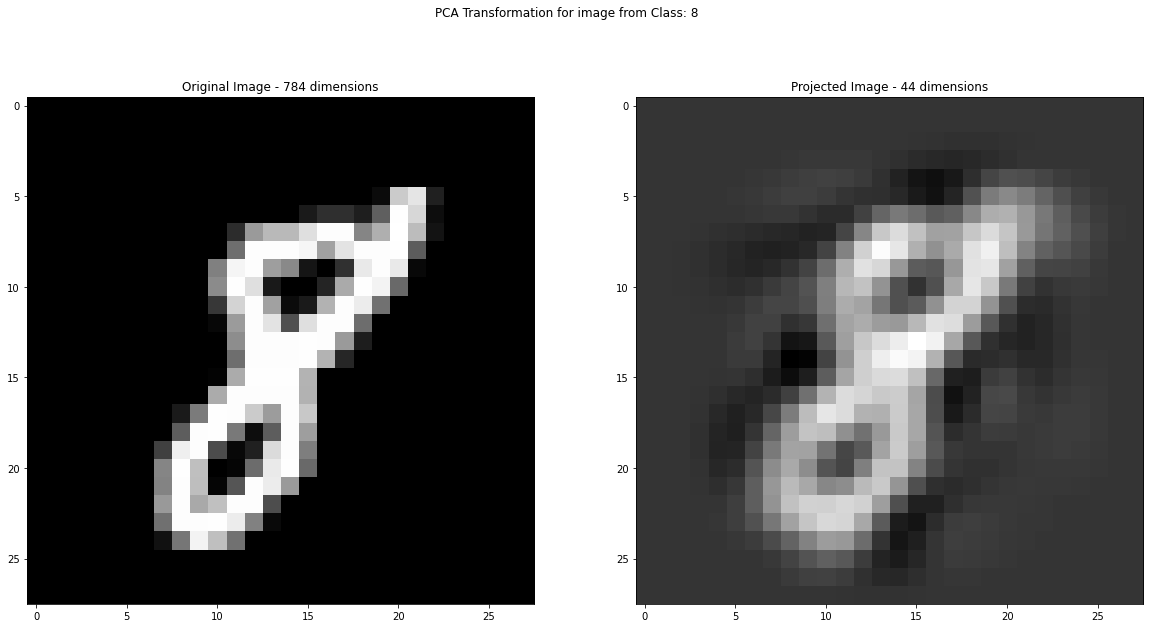

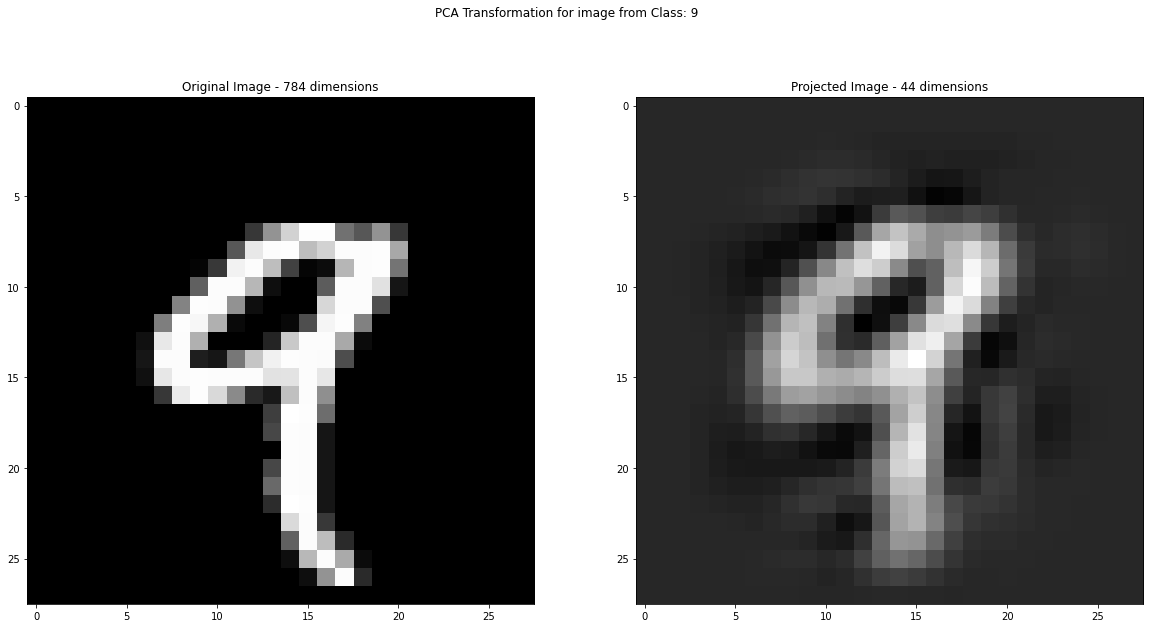

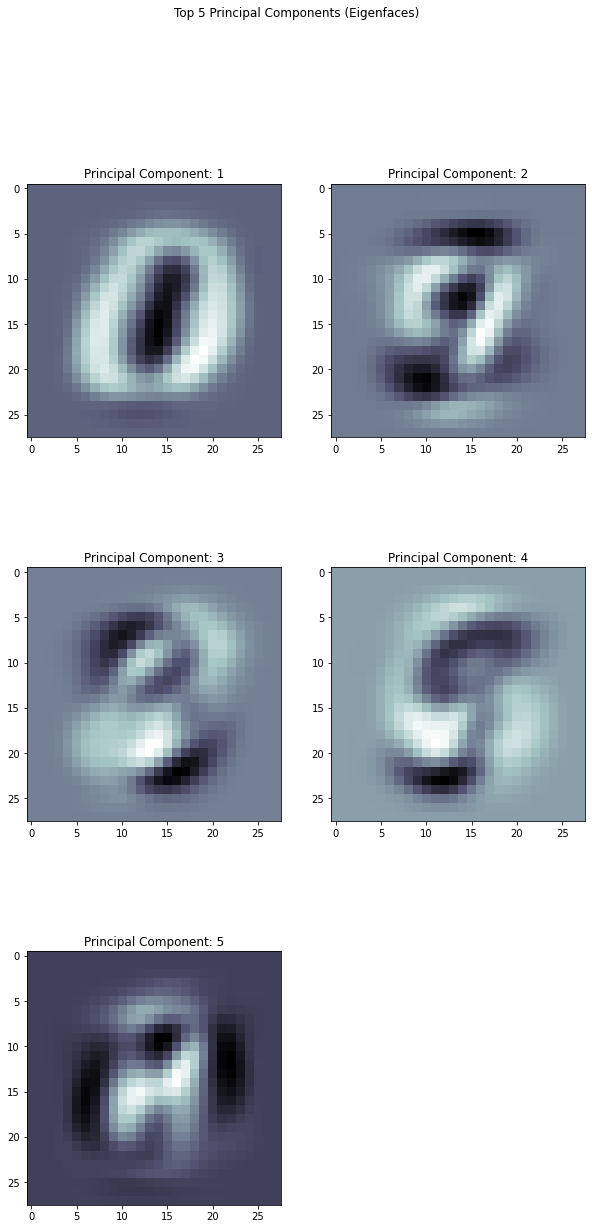

In [152]:
preprocessor = DataPreprocessing()

X_train = preprocessor.scale(X_train)
X_test = preprocessor.scale(X_test)


X_train_pca, X_test_pca = preprocessor.dimensionality_reduction(X_train, X_test, 0.8)
print(f"b: {preprocessor.num_components_before}, a: {preprocessor.num_components_after}")
preprocessor.plot(X_train, X_train_pca, y_train, plot_type='pca_images')
preprocessor.plot(plot_type="eigenfaces")


Balanced dataset -> chosen metric will be accuracy, no need for F1


Not removing highly correlated features as we would normally because
since the feature-set is composed of pixel-based features, neighbouring
pixels will likely have a high correlation - meaning we would need to
remove a lot which would end up destroying a large chunk of the image.



